In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
data = pd.read_csv("Mall_Customers.csv")

In [5]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

First few rows of the dataset:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [6]:
# Step 1: Preprocess the data (select relevant features for clustering)
# Here, we select the 'Annual Income' and 'Spending Score' columns for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# Step 2: Standardize the data (scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# Step 3: Use the Elbow Method to determine the optimal number of clusters (k)
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

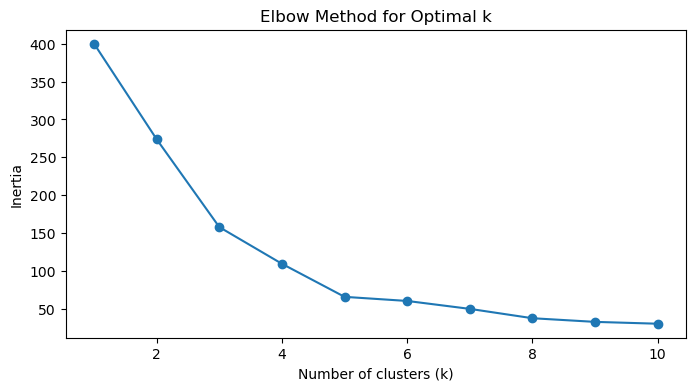

In [9]:
# Plot the Elbow Method
plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

In [10]:
# Step 4: Apply K-Means with the optimal number of clusters (Assume k=5 here based on elbow plot)
kmeans = KMeans(n_clusters=5, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


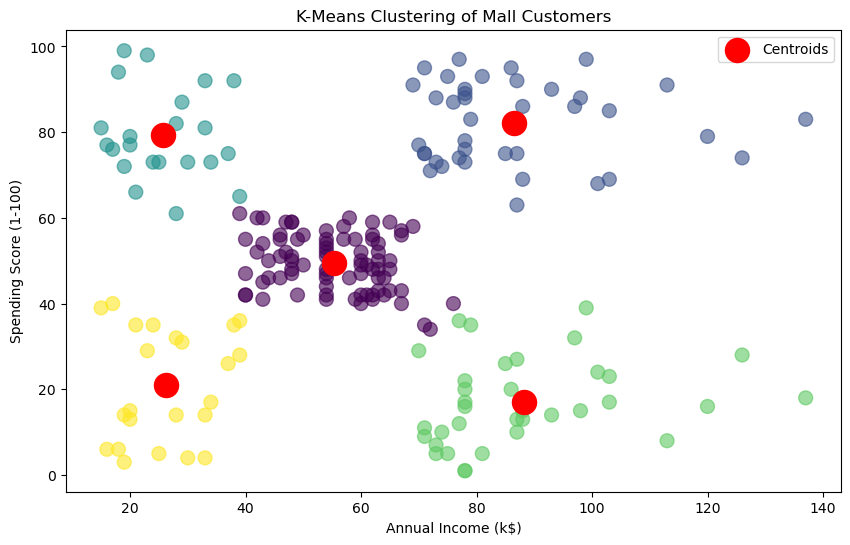

In [11]:
# Step 5: Visualize the clusters
plt.figure(figsize=(10, 6))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Cluster'], cmap='viridis', s=100, alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0] * scaler.scale_[0] + scaler.mean_[0], 
            kmeans.cluster_centers_[:, 1] * scaler.scale_[1] + scaler.mean_[1], 
            s=300, c='red', label='Centroids')
plt.title('K-Means Clustering of Mall Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [12]:
#q2

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [19]:
# Load the dataset (replace with the path to your dataset if local)
url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
data = pd.read_csv(url)

In [20]:
# Step 1: Select feature and target variable
# We'll use 'rm' (average number of rooms) as the feature and 'medv' (median value) as the target
X = data[['rm']]  # Single feature (average number of rooms)
y = data['medv']   # Target variable (house price in $1000s)

In [21]:
# Step 2: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Step 3: Train the Simple Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
# Step 4: Make predictions on the test data
y_pred = model.predict(X_test)

In [24]:
# Step 5: Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Model Performance:")
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Model Performance:
Mean Squared Error: 46.144775347317264
R-squared Score: 0.3707569232254778


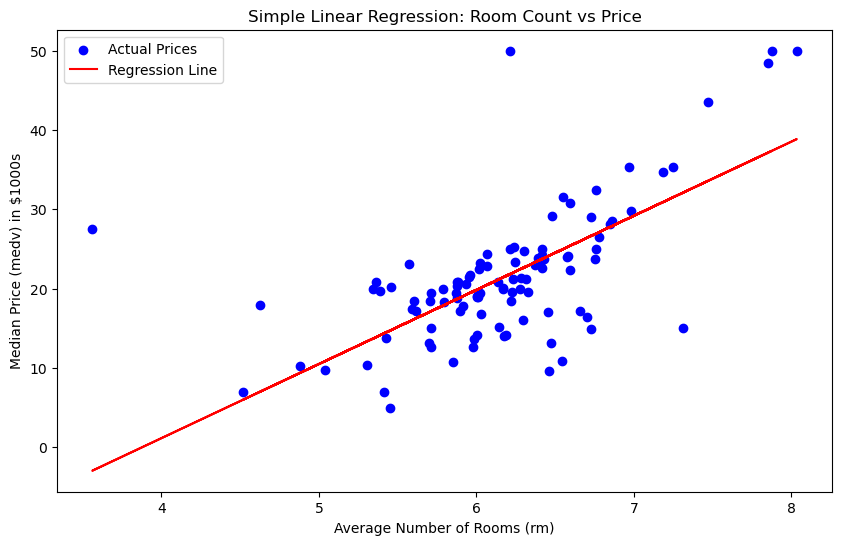

In [25]:
# Step 6: Visualize the regression line with the data points
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', label='Regression Line')
plt.xlabel('Average Number of Rooms (rm)')
plt.ylabel('Median Price (medv) in $1000s')
plt.title('Simple Linear Regression: Room Count vs Price')
plt.legend()
plt.show()